<a href="https://colab.research.google.com/github/rohansingh77/test/blob/main/New_Activation_Function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

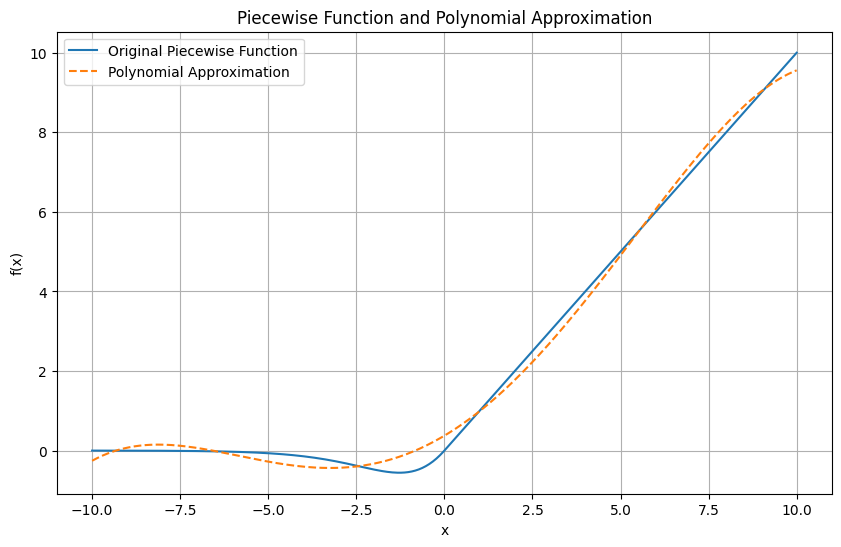

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the piecewise function
def piecewise_function(x):
    return np.where(x >= 0, x, 2 * x / (1 + np.exp(-x)))

# Generate data points
x = np.linspace(-10, 10, 400)
y = piecewise_function(x)

# Define a polynomial function for approximation
def poly_approx(x, a, b, c, d, e):
    return a * x**4 + b * x**3 + c * x**2 + d * x + e

# Fit the polynomial to the piecewise function
params, _ = curve_fit(poly_approx, x, y)

# Generate the approximated function values
y_approx = poly_approx(x, *params)

# Plot the original and approximated functions
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Original Piecewise Function')
plt.plot(x, y_approx, label='Polynomial Approximation', linestyle='--')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title('Piecewise Function and Polynomial Approximation')
plt.grid(True)
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Activation

# Define the polynomial activation function based on the fitted parameters
def poly_activation(x):
    a, b, c, d, e = params
    return a * x**4 + b * x**3 + c * x**2 + d * x + e

# Register the custom activation function
poly_activation_layer = Activation(poly_activation)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.2937 - loss: 2.0155 - val_accuracy: 0.3949 - val_loss: 1.6912
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4037 - loss: 1.6821 - val_accuracy: 0.4261 - val_loss: 1.6362
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4346 - loss: 1.5944 - val_accuracy: 0.4211 - val_loss: 1.6182
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4512 - loss: 1.5432 - val_accuracy: 0.4564 - val_loss: 1.5341
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4671 - loss: 1.5095 - val_accuracy: 0.4439 - val_loss: 1.5330
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4697 - loss: 1.4863 - val_accuracy: 0.4558 - val_loss: 1.5300
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4827 - loss: 1.4645 - val_accuracy: 0.4571 - val_loss: 1.5375
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4895 - loss: 1.4448 - 

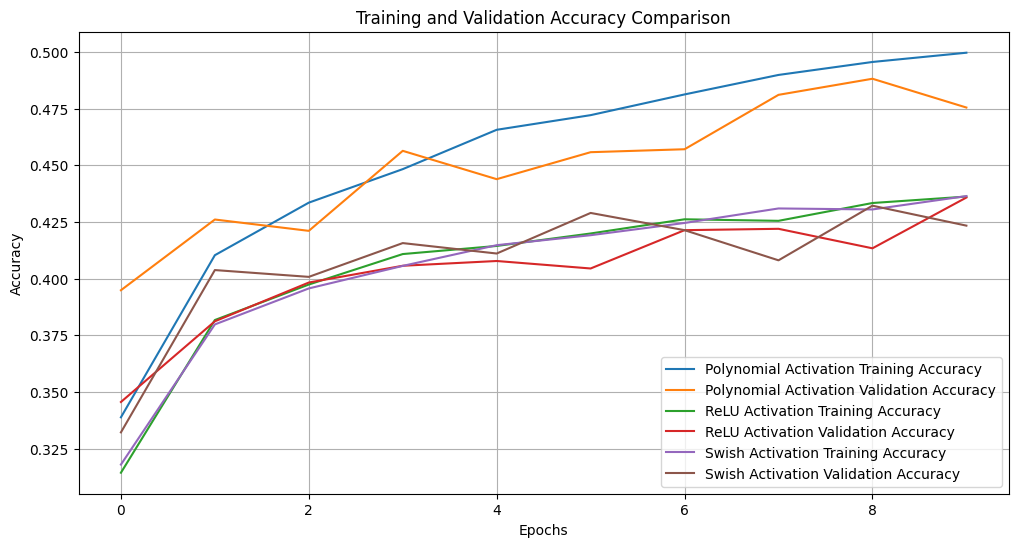

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10

# Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize the images to [0, 1]

# Create model with the custom polynomial activation function
model_poly = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(128),
    poly_activation_layer,
    Dense(10, activation='softmax')
])

# Compile the model
model_poly.compile(optimizer=Adam(),
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

# Create model with ReLU activation
model_relu = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model_relu.compile(optimizer=Adam(),
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

# Create model with Swish activation
def swish(x):
    return x * tf.sigmoid(x)

swish_activation_layer = Activation(swish)

model_swish = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(128),
    swish_activation_layer,
    Dense(10, activation='softmax')
])

# Compile the model
model_swish.compile(optimizer=Adam(),
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

# Train the models
history_poly = model_poly.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
history_relu = model_relu.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
history_swish = model_swish.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate the models
test_loss_poly, test_acc_poly = model_poly.evaluate(x_test, y_test, verbose=2)
test_loss_relu, test_acc_relu = model_relu.evaluate(x_test, y_test, verbose=2)
test_loss_swish, test_acc_swish = model_swish.evaluate(x_test, y_test, verbose=2)

print(f"Polynomial Activation Test accuracy: {test_acc_poly:.4f}")
print(f"ReLU Activation Test accuracy: {test_acc_relu:.4f}")
print(f"Swish Activation Test accuracy: {test_acc_swish:.4f}")

# Plot the training and validation accuracy for all models
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history_poly.history['accuracy'], label='Polynomial Activation Training Accuracy')
plt.plot(history_poly.history['val_accuracy'], label='Polynomial Activation Validation Accuracy')
plt.plot(history_relu.history['accuracy'], label='ReLU Activation Training Accuracy')
plt.plot(history_relu.history['val_accuracy'], label='ReLU Activation Validation Accuracy')
plt.plot(history_swish.history['accuracy'], label='Swish Activation Training Accuracy')
plt.plot(history_swish.history['val_accuracy'], label='Swish Activation Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy Comparison')
plt.grid(True)
plt.show()


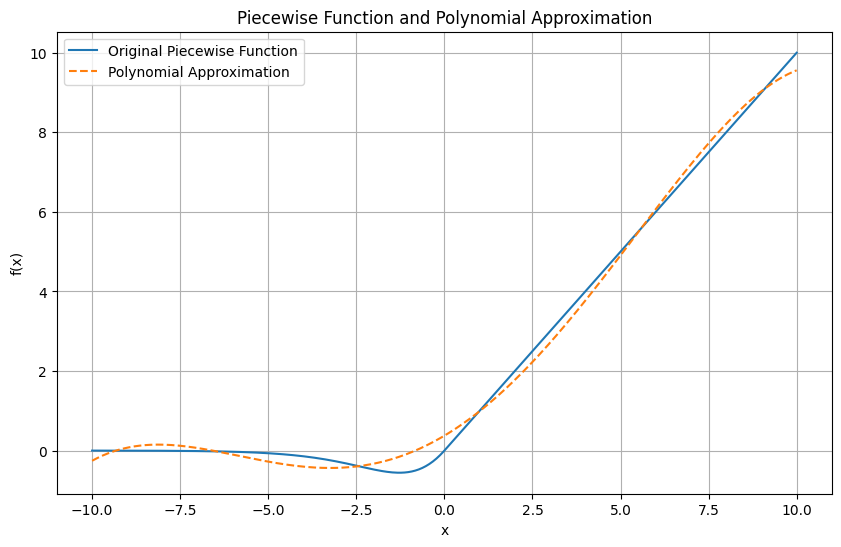

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.8298 - loss: 0.5690 - val_accuracy: 0.9438 - val_loss: 0.1882
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9475 - loss: 0.1762 - val_accuracy: 0.9575 - val_loss: 0.1391
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9644 - loss: 0.1140 - val_accuracy: 0.9667 - val_loss: 0.1059
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9752 - loss: 0.0811 - val_accuracy: 0.9710 - val_loss: 0.0945
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9797 - loss: 0.0637 - val_accuracy: 0.9696 - val_loss: 0.1056
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9832 - loss: 0.0520 - val_accuracy: 0.9726 - val_loss: 0.0941
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9870 - loss: 0.0405 - val_accuracy: 0.9774 - val_loss: 0.0777
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import tensorflow as tf
from tensorflow.keras.layers import Activation, Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Define the piecewise function
def piecewise_function(x):
    return np.where(x >= 0, x, 2 * x / (1 + np.exp(-x)))

# Define the polynomial activation function based on the fitted parameters
def poly_activation(x):
    a, b, c, d, e = params
    return a * x**4 + b * x**3 + c * x**2 + d * x + e

# Register the custom activation function
poly_activation_layer = Activation(poly_activation)

# Generate data points for approximation
x = np.linspace(-10, 10, 400)
y = piecewise_function(x)

# Define a polynomial function for curve fitting
def poly_approx(x, a, b, c, d, e):
    return a * x**4 + b * x**3 + c * x**2 + d * x + e

# Fit the polynomial to the piecewise function
params, _ = curve_fit(poly_approx, x, y)

# Plot the original and approximated functions
y_approx = poly_approx(x, *params)
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Original Piecewise Function')
plt.plot(x, y_approx, label='Polynomial Approximation', linestyle='--')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title('Piecewise Function and Polynomial Approximation')
plt.grid(True)
plt.show()

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28*28).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28*28).astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build the neural network model
model = Sequential()
model.add(Flatten(input_shape=(28*28,)))

# Add dense layers with custom polynomial activation
model.add(Dense(512))
model.add(Activation(poly_activation))  # Using custom polynomial activation

model.add(Dense(512))
model.add(Activation(poly_activation))

# Add the output layer with softmax activation for classification
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8705 - loss: 0.4289 - val_accuracy: 0.9574 - val_loss: 0.1387
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9617 - loss: 0.1224 - val_accuracy: 0.9702 - val_loss: 0.0992
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9776 - loss: 0.0714 - val_accuracy: 0.9727 - val_loss: 0.0909
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9823 - loss: 0.0561 - val_accuracy: 0.9766 - val_loss: 0.0811
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9858 - loss: 0.0439 - val_accuracy: 0.9783 - val_loss: 0.0812
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9890 - loss: 0.0357 - val_accuracy: 0.9764 - val_loss: 0.0956
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9913 - loss: 0.0268 - val_accuracy: 0.9806 - val_loss: 0.0797
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9922 - loss: 0.0255 - 

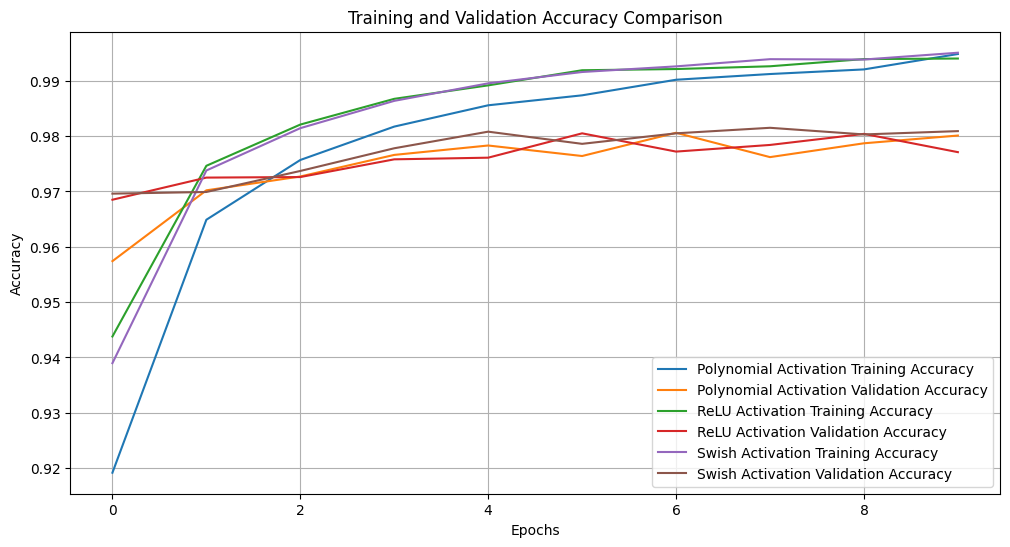

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import tensorflow as tf
from tensorflow.keras.layers import Activation, Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Define the piecewise function
def piecewise_function(x):
    return np.where(x >= 0, x, 2 * x / (1 + np.exp(-x)))

# Define the polynomial activation function based on the fitted parameters
def poly_activation(x):
    a, b, c, d, e = params
    return a * x**4 + b * x**3 + c * x**2 + d * x + e

# Generate data points for approximation
x = np.linspace(-10, 10, 400)
y = piecewise_function(x)

# Define a polynomial function for curve fitting
def poly_approx(x, a, b, c, d, e):
    return a * x**4 + b * x**3 + c * x**2 + d * x + e

# Fit the polynomial to the piecewise function
params, _ = curve_fit(poly_approx, x, y)

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28*28).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28*28).astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define a function to create models with different activations
def create_model(activation_func):
    model = Sequential()
    model.add(Flatten(input_shape=(28*28,)))
    model.add(Dense(512, activation=activation_func))
    model.add(Dense(512, activation=activation_func))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create models for each activation function
model_poly = create_model(poly_activation)
model_relu = create_model('relu')
model_swish = create_model(tf.keras.activations.swish)

# Train the models
history_poly = model_poly.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=1)
history_relu = model_relu.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=1)
history_swish = model_swish.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=1)

# Evaluate the models
test_loss_poly, test_acc_poly = model_poly.evaluate(x_test, y_test, verbose=2)
test_loss_relu, test_acc_relu = model_relu.evaluate(x_test, y_test, verbose=2)
test_loss_swish, test_acc_swish = model_swish.evaluate(x_test, y_test, verbose=2)

# Print test accuracies
print(f"Polynomial Activation Test accuracy: {test_acc_poly:.4f}")
print(f"ReLU Activation Test accuracy: {test_acc_relu:.4f}")
print(f"Swish Activation Test accuracy: {test_acc_swish:.4f}")

# Plot the training and validation accuracy for all models
plt.figure(figsize=(12, 6))
plt.plot(history_poly.history['accuracy'], label='Polynomial Activation Training Accuracy')
plt.plot(history_poly.history['val_accuracy'], label='Polynomial Activation Validation Accuracy')
plt.plot(history_relu.history['accuracy'], label='ReLU Activation Training Accuracy')
plt.plot(history_relu.history['val_accuracy'], label='ReLU Activation Validation Accuracy')
plt.plot(history_swish.history['accuracy'], label='Swish Activation Training Accuracy')
plt.plot(history_swish.history['val_accuracy'], label='Swish Activation Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy Comparison')
plt.grid(True)
plt.show()



Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2896 - loss: 2.0299 - val_accuracy: 0.3762 - val_loss: 1.7585
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4064 - loss: 1.6684 - val_accuracy: 0.4009 - val_loss: 1.6656
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4303 - loss: 1.5954 - val_accuracy: 0.4490 - val_loss: 1.5523
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4514 - loss: 1.5535 - val_accuracy: 0.4415 - val_loss: 1.5770
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4627 - loss: 1.5203 - val_accuracy: 0.4504 - val_loss: 1.5454
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4789 - loss: 1.4824 - val_accuracy: 0.4481 - val_loss: 1.5793
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4819 - loss: 1.4620 - val_accuracy: 0.4584 - val_loss: 1.5347
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4869 - loss: 1.4543 - 

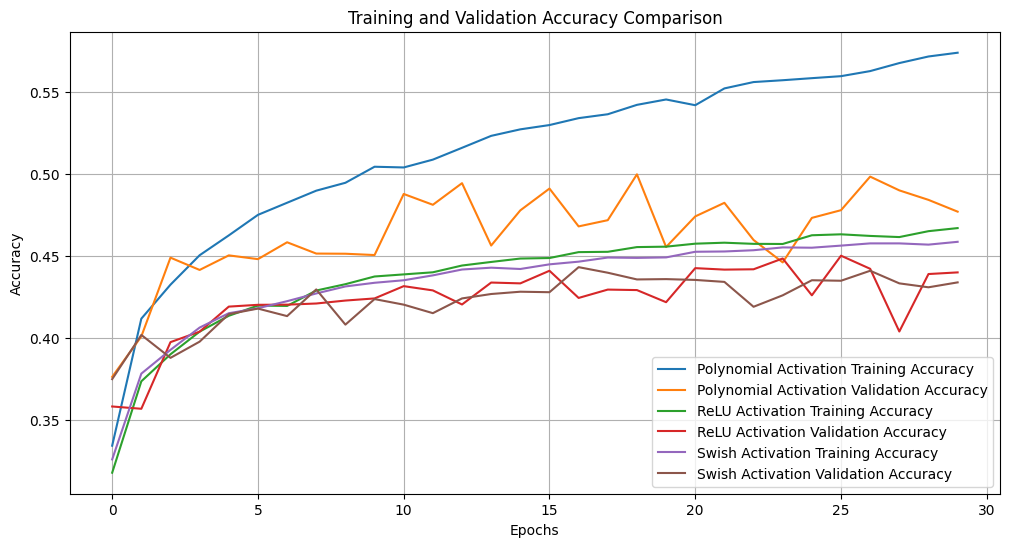

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10

# Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize the images to [0, 1]

# Create model with the custom polynomial activation function
model_poly = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(128),
    poly_activation_layer,
    Dense(10, activation='softmax')
])

# Compile the model
model_poly.compile(optimizer=Adam(),
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

# Create model with ReLU activation
model_relu = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model_relu.compile(optimizer=Adam(),
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

# Create model with Swish activation
def swish(x):
    return x * tf.sigmoid(x)

swish_activation_layer = Activation(swish)

model_swish = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(128),
    swish_activation_layer,
    Dense(10, activation='softmax')
])

# Compile the model
model_swish.compile(optimizer=Adam(),
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

# Train the models
history_poly = model_poly.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test))
history_relu = model_relu.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test))
history_swish = model_swish.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test))

# Evaluate the models
test_loss_poly, test_acc_poly = model_poly.evaluate(x_test, y_test, verbose=2)
test_loss_relu, test_acc_relu = model_relu.evaluate(x_test, y_test, verbose=2)
test_loss_swish, test_acc_swish = model_swish.evaluate(x_test, y_test, verbose=2)

print(f"Polynomial Activation Test accuracy: {test_acc_poly:.4f}")
print(f"ReLU Activation Test accuracy: {test_acc_relu:.4f}")
print(f"Swish Activation Test accuracy: {test_acc_swish:.4f}")

# Plot the training and validation accuracy for all models
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history_poly.history['accuracy'], label='Polynomial Activation Training Accuracy')
plt.plot(history_poly.history['val_accuracy'], label='Polynomial Activation Validation Accuracy')
plt.plot(history_relu.history['accuracy'], label='ReLU Activation Training Accuracy')
plt.plot(history_relu.history['val_accuracy'], label='ReLU Activation Validation Accuracy')
plt.plot(history_swish.history['accuracy'], label='Swish Activation Training Accuracy')
plt.plot(history_swish.history['val_accuracy'], label='Swish Activation Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy Comparison')
plt.grid(True)
plt.show()


Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.0577 - loss: 4.3076 - val_accuracy: 0.1264 - val_loss: 3.8077
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1443 - loss: 3.7001 - val_accuracy: 0.1539 - val_loss: 3.6407
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1636 - loss: 3.5605 - val_accuracy: 0.1510 - val_loss: 3.6729
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1828 - loss: 3.4568 - val_accuracy: 0.1605 - val_loss: 3.6860
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1926 - loss: 3.4057 - val_accuracy: 0.1873 - val_loss: 3.4707
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2046 - loss: 3.3444 - val_accuracy: 0.1688 - val_loss: 3.5834
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2135 - loss: 3.3025 - val_accuracy: 0.1852 - val_loss: 3.5709
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2212 - loss: 3.2428 -

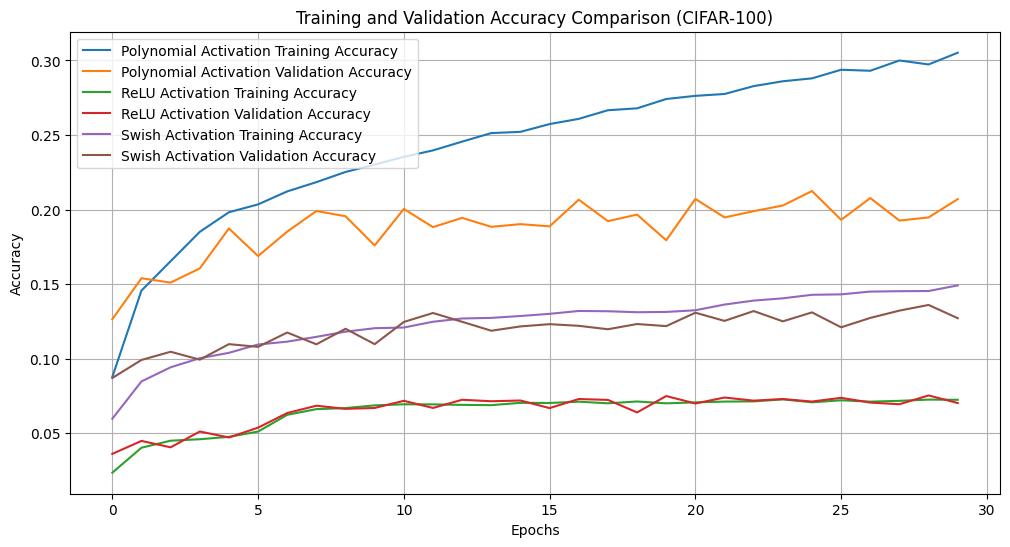

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
from scipy.optimize import curve_fit

# Define the polynomial activation function based on the fitted parameters
def poly_activation(x):
    a, b, c, d, e = params
    return a * x**4 + b * x**3 + c * x**2 + d * x + e

# Generate data points for approximation
x_data = np.linspace(-10, 10, 400)
y_data = np.where(x_data >= 0, x_data, 2 * x_data / (1 + np.exp(-x_data)))

# Define a polynomial function for curve fitting
def poly_approx(x, a, b, c, d, e):
    return a * x**4 + b * x**3 + c * x**2 + d * x + e

# Fit the polynomial to the piecewise function
params, _ = curve_fit(poly_approx, x_data, y_data)

# Define the custom polynomial activation layer
poly_activation_layer = Activation(poly_activation)

# Load and preprocess the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize the images to [0, 1]

# Create model with the custom polynomial activation function
model_poly = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(128),
    poly_activation_layer,
    Dense(100, activation='softmax')  # 100 classes for CIFAR-100
])

# Compile the model
model_poly.compile(optimizer=Adam(),
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

# Create model with ReLU activation
model_relu = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(128, activation='relu'),
    Dense(100, activation='softmax')
])

# Compile the model
model_relu.compile(optimizer=Adam(),
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

# Create model with Swish activation
def swish(x):
    return x * tf.sigmoid(x)

swish_activation_layer = Activation(swish)

model_swish = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(128),
    swish_activation_layer,
    Dense(100, activation='softmax')
])

# Compile the model
model_swish.compile(optimizer=Adam(),
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

# Train the models
history_poly = model_poly.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test), verbose=1)
history_relu = model_relu.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test), verbose=1)
history_swish = model_swish.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test), verbose=1)

# Evaluate the models
test_loss_poly, test_acc_poly = model_poly.evaluate(x_test, y_test, verbose=2)
test_loss_relu, test_acc_relu = model_relu.evaluate(x_test, y_test, verbose=2)
test_loss_swish, test_acc_swish = model_swish.evaluate(x_test, y_test, verbose=2)

# Print test accuracies
print(f"Polynomial Activation Test accuracy: {test_acc_poly:.4f}")
print(f"ReLU Activation Test accuracy: {test_acc_relu:.4f}")
print(f"Swish Activation Test accuracy: {test_acc_swish:.4f}")

# Plot the training and validation accuracy for all models
plt.figure(figsize=(12, 6))
plt.plot(history_poly.history['accuracy'], label='Polynomial Activation Training Accuracy')
plt.plot(history_poly.history['val_accuracy'], label='Polynomial Activation Validation Accuracy')
plt.plot(history_relu.history['accuracy'], label='ReLU Activation Training Accuracy')
plt.plot(history_relu.history['val_accuracy'], label='ReLU Activation Validation Accuracy')
plt.plot(history_swish.history['accuracy'], label='Swish Activation Training Accuracy')
plt.plot(history_swish.history['val_accuracy'], label='Swish Activation Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy Comparison (CIFAR-100)')
plt.grid(True)
plt.show()
